# Análisis de datos HAR

## Descargar los datos

Descargar la base de datos de [aquí](https://archive.ics.uci.edu/dataset/344/heterogeneity+activity+recognition)!

## Importar las librerías necesarias y cargar los datos en dataframes

🔹 **Qué hacer:**  
- Importa las librerías básicas necesarias para el análisis de datos 
- Carga los siguientes archivos CSV en diferentes DataFrames:
  - `Phones_accelerometer.csv`
  - `Phones_gyroscope.csv`
  - `Watch_accelerometer.csv`
  - `Watch_gyroscope.csv`

In [2]:
# Solucion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

path_directorio = '/home/asier/Escritorio/GitHub/homework_micro/Activity recognition exp/Activity recognition exp'

# Cargar los datos
Phones_accelerometer = pd.read_csv(f'{path_directorio}/Phones_accelerometer.csv')
Phones_gyroscope = pd.read_csv(f'{path_directorio}/Phones_gyroscope.csv')
Watch_accelerometer = pd.read_csv(f'{path_directorio}/Watch_accelerometer.csv')
Watch_gyroscope = pd.read_csv(f'{path_directorio}/Watch_gyroscope.csv')

## Ejercicio 1: Cargar y explorar los datos del acelerómetro de los teléfonos

**Trabajaremos inicialmente con el acelerómetro del teléfono (`df_subset_ph_acc`).**


🔹 **Qué hacer:** 
- Mostrar las primeras 5 filas.
- Hacer un gráfico de barras que muestre la distribucion de muestras por actividad

🔹 **¿Por qué es importante?:** Entender la estructura y el contenido del dataset.

🔹 **Preguntas de reflexión:**
- ¿Todas las columnas parecen relevantes para modelar actividades?
- ¿Hay columnas que parecen ser tiempo o identificadores?

In [17]:
# Solución

# He nombrado a df_subset_ph_acc como Phones_accelerometer

print(Phones_accelerometer.head())
print(Phones_accelerometer['gt'].value_counts())

# Gráfico de barras de la distribución de muestras por actividad
walk = Phones_accelerometer[Phones_accelerometer['gt'] == 'walk']
sit = Phones_accelerometer[Phones_accelerometer['gt'] == 'sit']
stand = Phones_accelerometer[Phones_accelerometer['gt'] == 'stand']
bike = Phones_accelerometer[Phones_accelerometer['gt'] == 'bike']
up = Phones_accelerometer[Phones_accelerometer['gt'] == 'stairsup']
down = Phones_accelerometer[Phones_accelerometer['gt'] == 'stairsdown']

   Index   Arrival_Time        Creation_Time         x         y         z  \
0      0  1424696633908  1424696631913248572 -5.958191  0.688065  8.135345   
1      1  1424696633909  1424696631918283972 -5.952240  0.670212  8.136536   
2      2  1424696633918  1424696631923288855 -5.995087  0.653549  8.204376   
3      3  1424696633919  1424696631928385290 -5.942718  0.676163  8.128204   
4      4  1424696633929  1424696631933420691 -5.991516  0.641647  8.135345   

  User   Model    Device     gt  
0    a  nexus4  nexus4_1  stand  
1    a  nexus4  nexus4_1  stand  
2    a  nexus4  nexus4_1  stand  
3    a  nexus4  nexus4_1  stand  
4    a  nexus4  nexus4_1  stand  
gt
walk          2192401
sit           1991919
stand         1851492
bike          1845557
stairsup      1782010
stairsdown    1615896
Name: count, dtype: int64


**Interpretación:**



**Visualización extra:** Distribución de muestras por actividad.

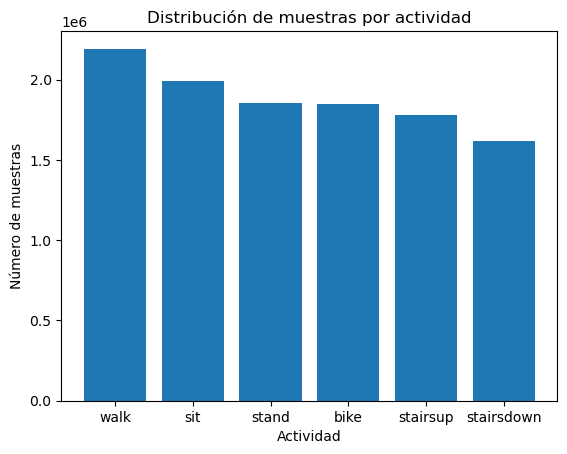

In [4]:
# Solución
activities = ['walk', 'sit', 'stand', 'bike', 'stairsup', 'stairsdown']
counts = [len(walk), len(sit), len(stand), len(bike), len(up), len(down)]
plt.bar(activities,counts)
plt.xlabel('Actividad')
plt.ylabel('Número de muestras')
plt.title('Distribución de muestras por actividad')
plt.show()

**Visualización extra:** Histogramas de cada eje y Boxplots.

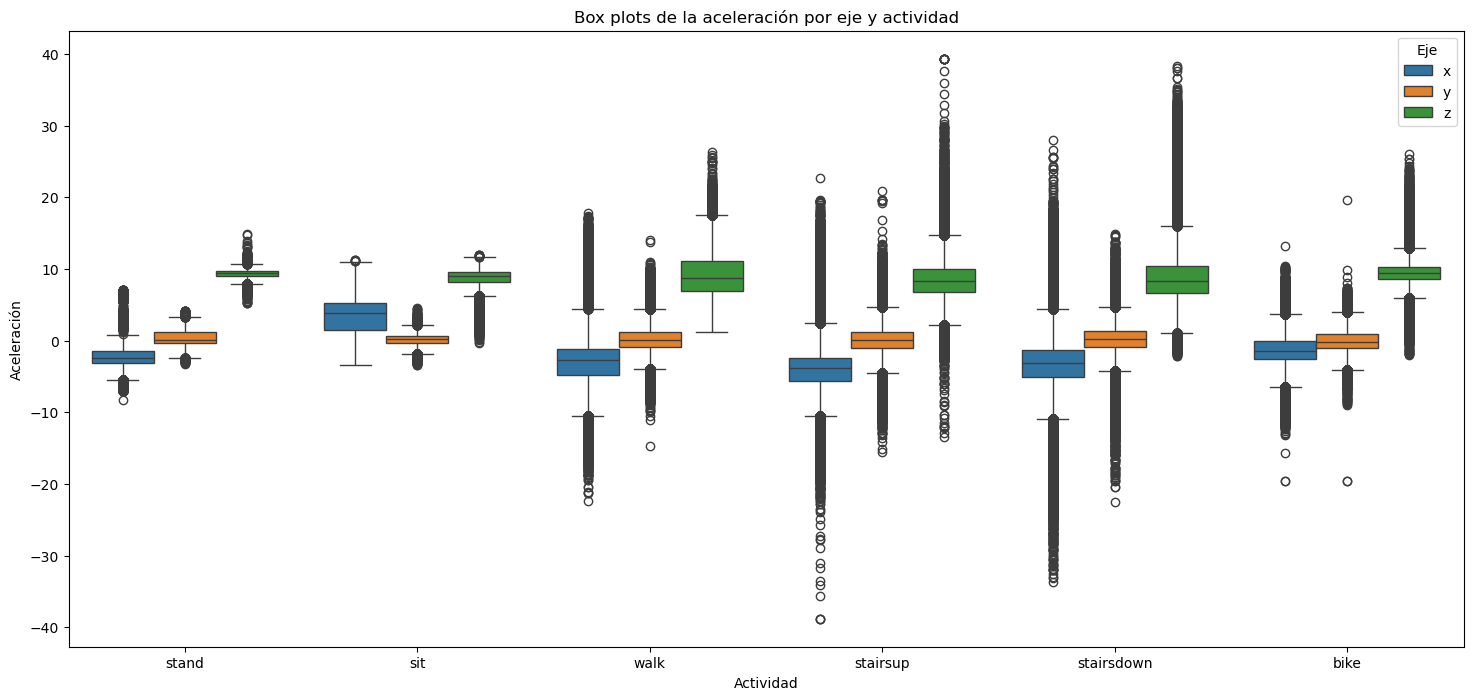

In [5]:
# Box plots por actividad 

# Preparar los datos para el boxplot
df_melted = pd.melt(Phones_accelerometer, id_vars=['gt'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='acceleration')

# Crear el boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x='gt', y='acceleration', hue='axis', data=df_melted)
plt.title('Box plots de la aceleración por eje y actividad')
plt.xlabel('Actividad')
plt.ylabel('Aceleración')
plt.legend(title='Eje')
plt.show()

           gt         x         y         z
0        bike -1.337308 -0.068326  9.399014
1         sit  3.762870  0.155249  8.438220
2  stairsdown -3.216161  0.198635  8.869204
3    stairsup -3.903135  0.124511  8.482344
4       stand -2.419891  0.353311  9.194293
5        walk -2.909116  0.158189  9.070242


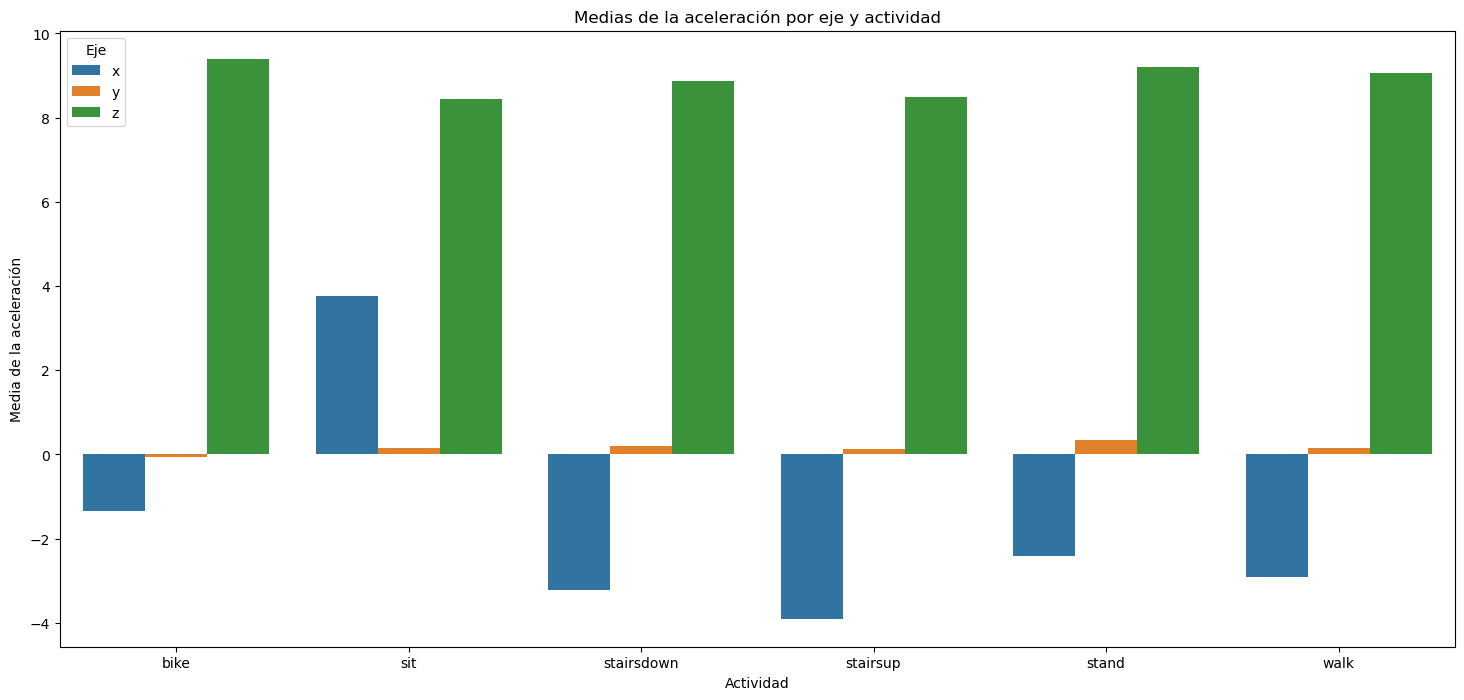

In [6]:
# Barras de medias por ejes y por actividad
mean_values = Phones_accelerometer.groupby('gt')[['x', 'y', 'z']].mean().reset_index()
print(mean_values)
mean_values_melted = pd.melt(mean_values, id_vars=['gt'], value_vars=['x', 'y', 'z'], var_name='axis', value_name='mean_acceleration')
plt.figure(figsize=(18, 8))
sns.barplot(x='gt', y='mean_acceleration', hue='axis', data=mean_values_melted)
plt.title('Medias de la aceleración por eje y actividad')
plt.xlabel('Actividad')
plt.ylabel('Media de la aceleración')
plt.legend(title='Eje')
plt.show()

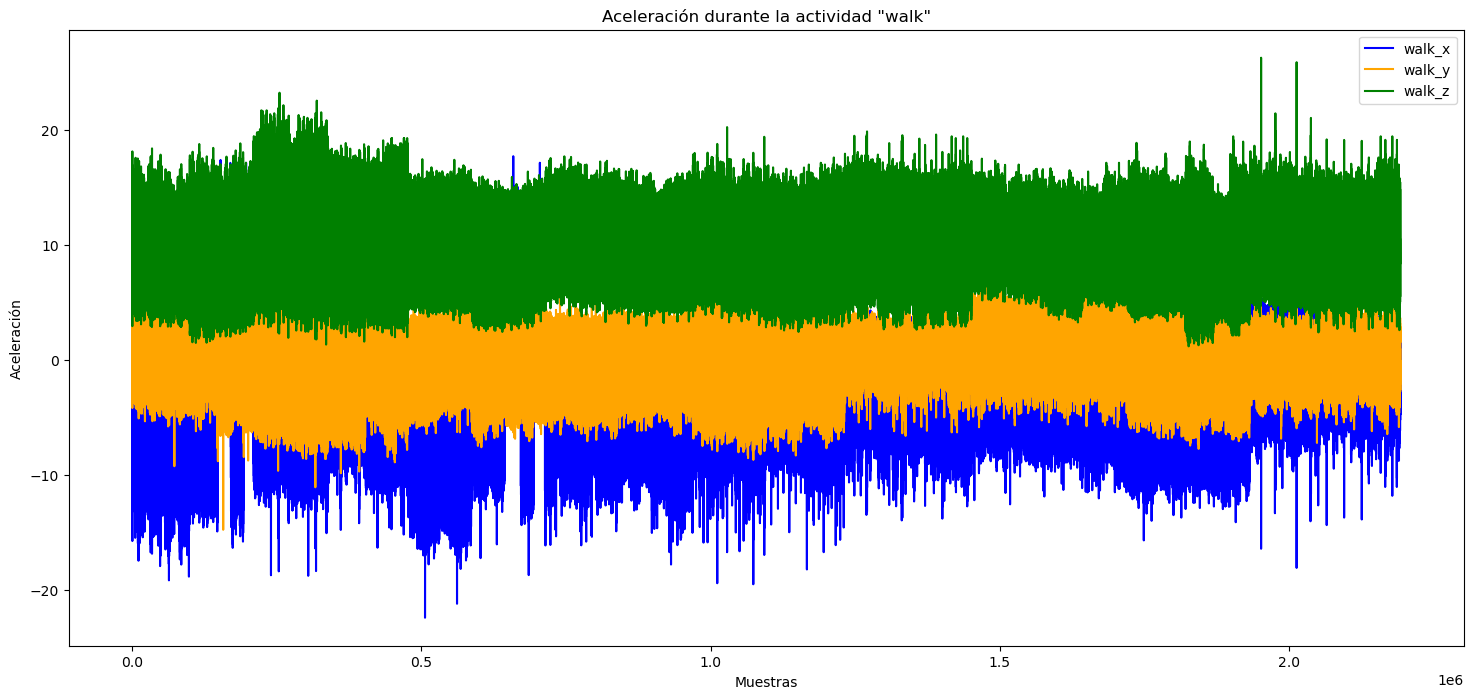

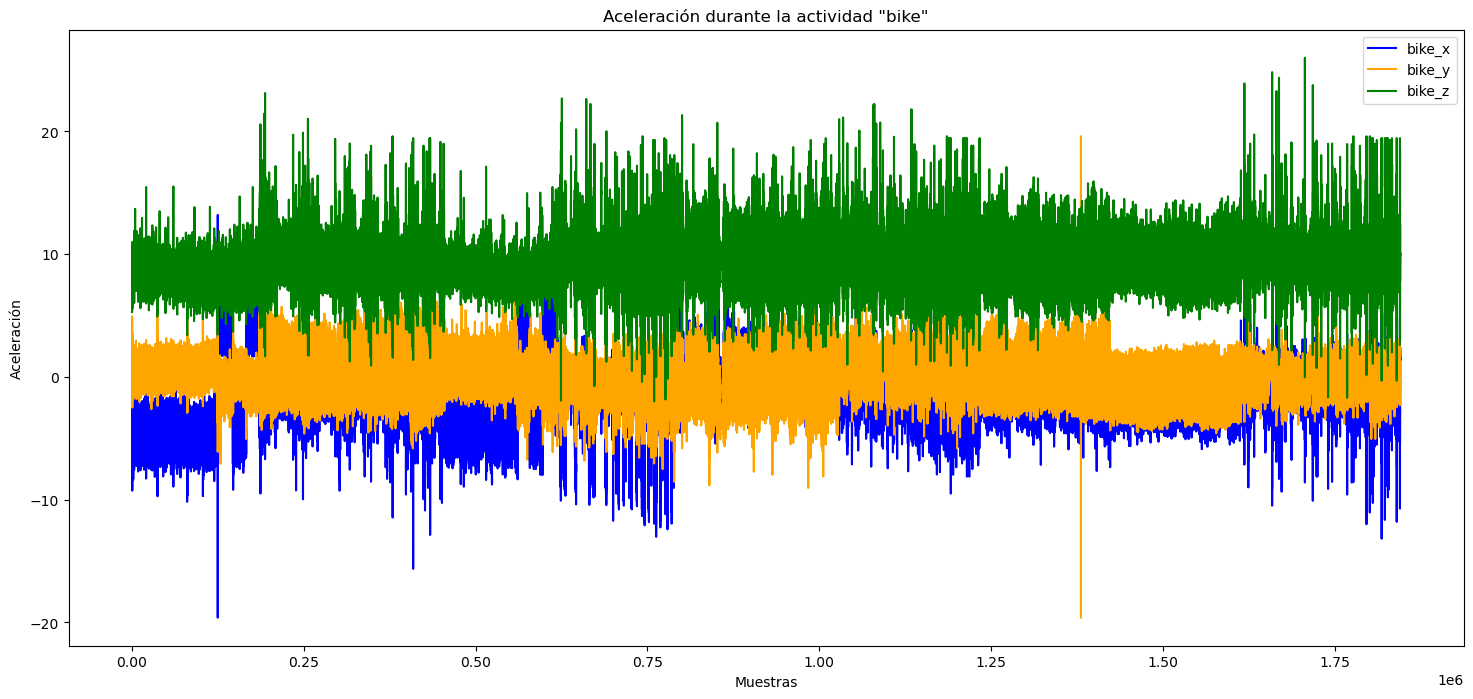

In [10]:
# Grafica de la grafica de la aceleracion por ejes y actividades entre 'walk' y 'bike'

#Separar los tiempos por listas cuando la separacion entre grupos de tiempos es grande

walk_time = walk['Creation_Time']
walk_x = walk['x']
walk_y = walk['y']
walk_z = walk['z']

bike_x = bike['x']
bike_y = bike['y']
bike_z = bike['z']
bike_time = bike['Arrival_Time']


plt.figure(figsize=(18, 8))
plt.plot(walk_x.values, label='walk_x', color='blue')
plt.plot(walk_y.values, label='walk_y', color='orange')
plt.plot(walk_z.values, label='walk_z', color='green')
plt.title('Aceleración durante la actividad "walk"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.legend()
plt.show()



plt.figure(figsize=(18, 8))
plt.plot(bike_x.values, label='bike_x', color='blue')
plt.plot(bike_y.values, label='bike_y', color='orange')
plt.plot(bike_z.values, label='bike_z', color='green')
plt.title('Aceleración durante la actividad "bike"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.legend()
plt.show()

# Grafica de la grafica de la aceleracion por ejes y actividades entre 'walk' y 'bike'

#Separar los tiempos por listas cuando la separacion entre grupos de tiempos es grande

walk_time = walk['Arrival_Time']
walk_x = walk['x']
walk_y = walk['y']
walk_z = walk['z']

bike_x = bike['x']
bike_y = bike['y']
bike_z = bike['z']
bike_time = bike['Arrival_Time']


plt.figure(figsize=(18, 8))
plt.plot(walk_time.values, walk_x.values, label='walk_x', color='blue')
plt.plot(walk_time.values, walk_y.values, label='walk_y', color='orange')
plt.plot(walk_time.values, walk_z.values, label='walk_z', color='green')
plt.title('Aceleración durante la actividad "walk"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.xscale('log')
plt.legend()
plt.show()



plt.figure(figsize=(18, 8))
plt.plot(bike_time.values, bike_x.values, label='bike_x', color='blue')
plt.plot(bike_time.values, bike_y.values, label='bike_y', color='orange')
plt.plot(bike_time.values, bike_z.values, label='bike_z', color='green')
plt.title('Aceleración durante la actividad "bike"')
plt.xlabel('Muestras')
plt.ylabel('Aceleración')
plt.xscale('log')
plt.legend()
plt.show()

# Ejemplo: Agrupar tiempos por actividad
print("Tiempos agrupados por actividad:")
grouped_times = Phones_accelerometer.groupby('gt')['Arrival_Time'].apply(list)
print(grouped_times)

# Ejemplo: Agrupar tiempos en bins (rangos) para 'walk'
walk_times = walk['Arrival_Time']
bins = pd.cut(walk_times, bins=10)  # 10 bins automáticos
print("\nTiempos de 'walk' agrupados en 10 bins:")
print(bins.value_counts().sort_index())

In [11]:
# Solución
print('Medias de las muestras de la actividad "walk":')
print(walk.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "walk":')
print(walk.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "walk":')
print(walk.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "walk":')
print(walk.describe().loc['max'])

Medias de las muestras de la actividad "walk":
Index            1.063220e+05
Arrival_Time     1.424745e+12
Creation_Time    6.891290e+17
x               -2.909116e+00
y                1.581895e-01
z                9.070242e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "walk":
Index            1.063220e+05
Arrival_Time     1.424745e+12
Creation_Time    6.891290e+17
x               -2.909116e+00
y                1.581895e-01
z                9.070242e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "walk":
Index            4.627288e+04
Arrival_Time     4.384051e+07
Creation_Time    7.119304e+17
x                3.179188e+00
y                1.787383e+00
z                2.787167e+00
Name: std, dtype: float64
Mínimo de las muestras de la actividad "walk":
Index            4.627288e+04
Arrival_Time     4.384051e+07
Creation_Time    7.119304e+17
x                3.179188e+00
y                1.787383e+00
z               

In [12]:
print('Medias de las muestras de la actividad "sit":')
print(sit.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "sit":')
print(sit.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "sit":')
print(sit.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "sit":')
print(sit.describe().loc['max'])

Medias de las muestras de la actividad "sit":
Index            5.360638e+04
Arrival_Time     1.424741e+12
Creation_Time    7.044035e+17
x                3.762870e+00
y                1.552490e-01
z                8.438220e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "sit":
Index            2.826216e+04
Arrival_Time     4.395960e+07
Creation_Time    7.122630e+17
x                2.949414e+00
y                8.045728e-01
z                1.807950e+00
Name: std, dtype: float64
Mínimo de las muestras de la actividad "sit":
Index            0.000000e+00
Arrival_Time     1.424687e+12
Creation_Time    8.297821e+11
x               -3.380613e+00
y               -3.370994e+00
z               -3.064578e-01
Name: min, dtype: float64
Máximo de las muestras de la actividad "sit":
Index            2.826216e+04
Arrival_Time     4.395960e+07
Creation_Time    7.122630e+17
x                2.949414e+00
y                8.045728e-01
z                1.807950e+00
Name

In [13]:
print('Medias de las muestras de la actividad "stand":')
print(stand.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "stand":')
print(stand.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "stand":')
print(stand.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "stand":')
print(stand.describe().loc['max'])

Medias de las muestras de la actividad "stand":
Index            2.250609e+04
Arrival_Time     1.424743e+12
Creation_Time    7.009364e+17
x               -2.419891e+00
y                3.533109e-01
z                9.194293e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "stand":
Index            2.250609e+04
Arrival_Time     1.424743e+12
Creation_Time    7.009364e+17
x               -2.419891e+00
y                3.533109e-01
z                9.194293e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "stand":
Index            1.946083e+04
Arrival_Time     4.393796e+07
Creation_Time    7.122170e+17
x                2.141182e+00
y                9.512365e-01
z                7.283199e-01
Name: std, dtype: float64
Mínimo de las muestras de la actividad "stand":
Index            1.946083e+04
Arrival_Time     4.393796e+07
Creation_Time    7.122170e+17
x                2.141182e+00
y                9.512365e-01
z           

**Interpretación:**



In [14]:
print('Medias de las muestras de la actividad "bike":')
print(bike.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "bike":')
print(bike.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "bike":')
print(bike.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "bike":')
print(bike.describe().loc['max'])

Medias de las muestras de la actividad "bike":
Index            2.293773e+05
Arrival_Time     1.424749e+12
Creation_Time    6.668453e+17
x               -1.337308e+00
y               -6.832591e-02
z                9.399014e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "bike":
Index            9.531777e+04
Arrival_Time     4.322686e+07
Creation_Time    7.108524e+17
x                2.352262e+00
y                1.535158e+00
z                1.383323e+00
Name: std, dtype: float64
Mínimo de las muestras de la actividad "bike":
Index            2.293773e+05
Arrival_Time     1.424749e+12
Creation_Time    6.668453e+17
x               -1.337308e+00
y               -6.832591e-02
z                9.399014e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "bike":
Index            9.531777e+04
Arrival_Time     4.322686e+07
Creation_Time    7.108524e+17
x                2.352262e+00
y                1.535158e+00
z               

In [15]:
print('Medias de las muestras de la actividad "stairup":')
print(up.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "stairup":')
print(up.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "stairup":')
print(up.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "stairup":')
print(up.describe().loc['max'])

Medias de las muestras de la actividad "stairup":
Index            1.596493e+05
Arrival_Time     1.424746e+12
Creation_Time    6.689326e+17
x               -3.903135e+00
y                1.245106e-01
z                8.482344e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "stairup":
Index            6.962130e+04
Arrival_Time     4.351111e+07
Creation_Time    7.109829e+17
x                3.363829e+00
y                1.983703e+00
z                2.473584e+00
Name: std, dtype: float64
Mínimo de las muestras de la actividad "stairup":
Index            8.600000e+01
Arrival_Time     1.424688e+12
Creation_Time    1.701013e+12
x               -3.881207e+01
y               -1.548180e+01
z               -1.342387e+01
Name: min, dtype: float64
Máximo de las muestras de la actividad "stairup":
Index            6.962130e+04
Arrival_Time     4.351111e+07
Creation_Time    7.109829e+17
x                3.363829e+00
y                1.983703e+00
z                2

In [16]:
print('Medias de las muestras de la actividad "stairdown":')
print(down.describe().loc['mean'])
print('==============================================================')
print('Desviación estándar de las muestras de la actividad "stairdown":')
print(down.describe().loc['std'])
print('==============================================================')
print('Mínimo de las muestras de la actividad "stairdown":')
print(down.describe().loc['min'])
print('==============================================================')
print('Máximo de las muestras de la actividad "stairdown":')
print(down.describe().loc['max'])

Medias de las muestras de la actividad "stairdown":
Index            1.601063e+05
Arrival_Time     1.424743e+12
Creation_Time    6.605186e+17
x               -3.216161e+00
y                1.986354e-01
z                8.869204e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "stairdown":
Index            1.601063e+05
Arrival_Time     1.424743e+12
Creation_Time    6.605186e+17
x               -3.216161e+00
y                1.986354e-01
z                8.869204e+00
Name: mean, dtype: float64
Desviación estándar de las muestras de la actividad "stairdown":
Index            7.095973e+04
Arrival_Time     4.383598e+07
Creation_Time    7.104180e+17
x                3.638460e+00
y                1.845679e+00
z                3.364039e+00
Name: std, dtype: float64
Mínimo de las muestras de la actividad "stairdown":
Index            7.095973e+04
Arrival_Time     4.383598e+07
Creation_Time    7.104180e+17
x                3.638460e+00
y                1.845679e

## Ejercicio 3: Filtrar actividades específicas (walk vs sit)

🔹 **Qué hacer:**  
- Filtra el DataFrame `df_subset_ph_acc` para obtener dos nuevos subconjuntos: uno con los registros de la actividad `walk` y otro de `sit`.
- Muestra el número de registros para cada actividad.
- Representa los resultados en un **gráfico de barras** comparando el número de muestras de `walk` vs `sit`.

🔹 **¿Por qué es importante?:**  
- Filtrar datos por condiciones específicas es fundamental para realizar análisis focalizados.
- Visualizar el balance entre clases ayuda a detectar posibles problemas de desbalanceo, muy relevantes para la calidad de los modelos de predicción.

🔹 **Preguntas para reflexión:**  
- ¿Es equilibrado el número de muestras entre `walk` y `sit`?
- ¿Qué problemas podría traer un desbalance muy grande entre clases?
- ¿Cómo podrías corregir un desbalance si fuera necesario?


Numero de registros de la actividad "walk": 2192401
Numero de registros de la actividad "sit": 1991919


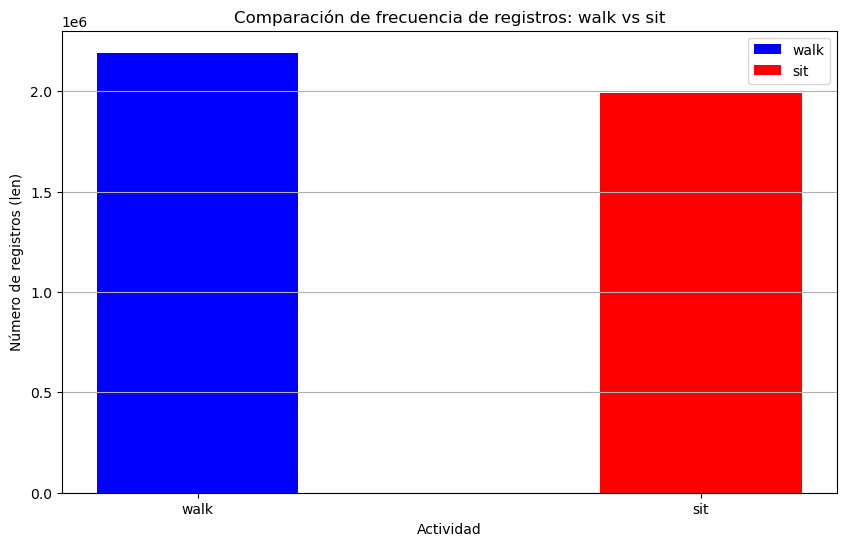

In [21]:
# Solución

wall = Phones_accelerometer[Phones_accelerometer['gt'] == 'walk']
sit = Phones_accelerometer[Phones_accelerometer['gt'] == 'sit']

print('Numero de registros de la actividad "walk":', len(wall))
print('Numero de registros de la actividad "sit":', len(sit))

# Gráfico de barras comparando los conteos (len) de walk y sit, separados en la gráfica
plt.figure(figsize=(10, 6))
plt.bar([0], [len(wall)], width=0.4, color='blue', label='walk', align='center')
plt.bar([1], [len(sit)], width=0.4, color='red', label='sit', align='center')
plt.xticks([0, 1], ['walk', 'sit'])
plt.xlabel('Actividad')
plt.ylabel('Número de registros (len)')
plt.title('Comparación de frecuencia de registros: walk vs sit')
plt.legend()
plt.grid(axis='y')
plt.show()

**Interpretación:**



🔹 **Preguntas para reflexión:**  
- ¿Es equilibrado el número de muestras entre `walk` y `sit`?

El numero de muestras entre conjuntos es notoriamente diferente ya que al realizar la comparativa a través del histograma en escala logaritmica, estos difieren entre si. Sin embargo, debido al numero tan alto de datos en ambos conjuntos es posible realizar alguna estadistica entre sí.

- ¿Qué problemas podría traer un desbalance muy grande entre clases?

A la hora de realizar procesos de machine learning, esto podría acarrear un favorecimiento a al conjunto de datos mayor haciendo que el método este sesgado. Por otra parte las métricas podrían llegar a ser enagñosas y esto desenbocaría en un error en la descripción final de los análisis de datos.

- ¿Cómo podrías corregir un desbalance si fuera necesario?

Sí, se podrían corrergir a través de diferentes técnicas como con una mayor recolección de datos, técnicas de resampling o de modelado del algoritmo. .


## Ejercicio 4: Agrupación por actividad y Gráfico comparativo de actividades
🔹 **Qué hacer:** 
- Agrupar por tipo de actividad y calcular medias de `x`, `y`, `z`.
- Hacer un gráfico de barras de medias de `x`, `y`, `z` para 'walk', 'sit' y 'stairsup'.

🔹 **¿Por qué es importante?:** 
- Permite comparar globalmente la dinámica de cada actividad y ver si son fáciles de distinguir.
- Visualizar los patrones ayuda a detectar actividades más fáciles o difíciles de clasificar.

🔹 **Interpretación esperada:** Actividades dinámicas como caminar, correr, subir escaleras deberían tener aceleraciones mayores que sentarse.

🔹 **Preguntas para reflexión:**
- ¿Qué actividades parecen más similares entre sí?
- ¿Qué actividades podrían confundirse en un modelo de clasificación?
- ¿Qué actividad tiene el perfil de aceleración más alto?
- ¿Podríamos usar esta diferencia directamente como una característica para clasificación?




Las medias por ejes de las actividades son:
Media de la actividad "walk":
x   -2.909116
y    0.158189
z    9.070242
dtype: float64
Media de la actividad "bike":
x   -1.337308
y   -0.068326
z    9.399014
dtype: float64
Media de la actividad "stairsup":
x   -3.903135
y    0.124511
z    8.482344
dtype: float64
Media de la actividad "stairsdown":
x   -3.216161
y    0.198635
z    8.869204
dtype: float64
Media de la actividad "stand":
x   -2.419891
y    0.353311
z    9.194293
dtype: float64


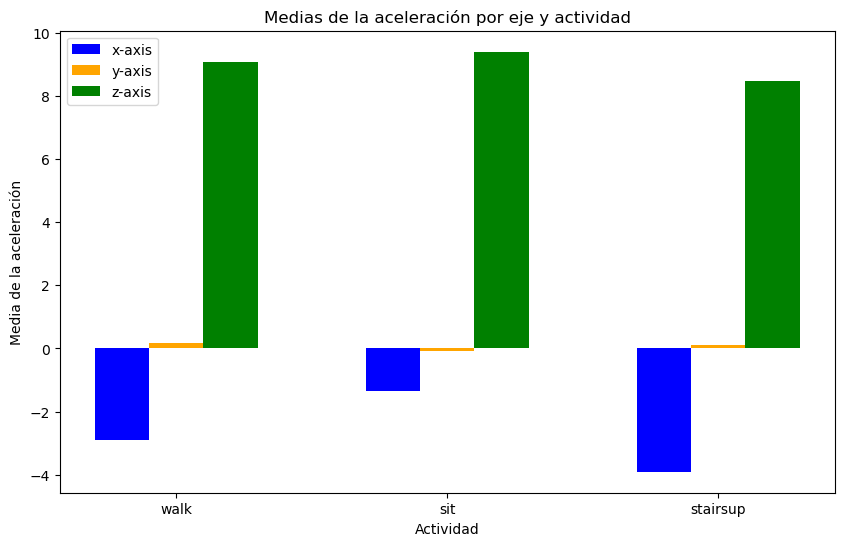

In [23]:
# Solución

walk = Phones_accelerometer[Phones_accelerometer['gt'] == 'walk']
bike = Phones_accelerometer[Phones_accelerometer['gt'] == 'bike']
up = Phones_accelerometer[Phones_accelerometer['gt'] == 'stairsup']
down = Phones_accelerometer[Phones_accelerometer['gt'] == 'stairsdown']
stand = Phones_accelerometer[Phones_accelerometer['gt'] == 'stand']

mean_walk = walk[['x', 'y', 'z']].mean()
mean_bike = bike[['x', 'y', 'z']].mean()
mean_up = up[['x', 'y', 'z']].mean()
mean_down = down[['x', 'y', 'z']].mean()
mean_stand = stand[['x', 'y', 'z']].mean()  

print('Las medias por ejes de las actividades son:')

print('Media de la actividad "walk":')
print(mean_walk)
print('Media de la actividad "bike":')
print(mean_bike)
print('Media de la actividad "stairsup":')
print(mean_up)
print('Media de la actividad "stairsdown":')
print(mean_down)
print('Media de la actividad "stand":')
print(mean_stand)


# Gráfico de barras de medias x,y,z para 'walk', 'sit' y 'stairup'
activities = ['walk', 'sit', 'stairsup']
mean_values = [mean_walk, mean_bike, mean_up]
x_means = [mv['x'] for mv in mean_values]
y_means = [mv['y'] for mv in mean_values]
z_means = [mv['z'] for mv in mean_values]
x = np.arange(len(activities))
width = 0.2
plt.figure(figsize=(10, 6))
plt.bar(x - width, x_means, width, label='x-axis', color='blue')
plt.bar(x, y_means, width, label='y-axis', color='orange')
plt.bar(x + width, z_means, width, label='z-axis', color='green')
plt.xlabel('Actividad')
plt.ylabel('Media de la aceleración')
plt.title('Medias de la aceleración por eje y actividad')
plt.xticks(x, activities)
plt.legend()
plt.show()

## Ejercicio 5: Clasificación de actividades

🔹 **Qué hacer:**  
- Crea una nueva columna `activity_type` en el DataFrame, clasificando las actividades de la columna `gt` en **"Dinámica"** (`walk`, `stairsup`, `stairsdown`, `run`, `bike`) o **"Estática"** (el resto).  
- Muestra una tabla con las primeras filas (`head()`) mostrando `gt` y `activity_type`.  
- Representa en una **gráfica de barras** la cantidad de muestras de actividades "Dinámica" y "Estática".

🔹 **¿Por qué es importante?:**  
- Saber transformar datos categóricos en grupos más simples es clave para entender mejor los datos y preparar análisis o modelos más robustos.  
- Aprenderás a crear nuevas columnas de forma programada, un paso esencial en cualquier proyecto de análisis de datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pasa si agregamos o quitamos actividades de la clasificación?  
- ¿Crees que esta agrupación podría afectar a un modelo que predice tipos de actividad? ¿Por qué?  
- ¿Qué otras maneras de agrupar actividades se te ocurren?

In [25]:
# Solución
# Añadir al dataframe una nueva columna 'activity_type' basada en la condición anterior
Phones_accelerometer['activity_type'] = Phones_accelerometer['gt'].apply(lambda x: 'Dinámica' if x in ['walk','stairsup','stairdown','run','bike'] else 'Estática')
print(Phones_accelerometer.head())

   Index   Arrival_Time        Creation_Time         x         y         z  \
0      0  1424696633908  1424696631913248572 -5.958191  0.688065  8.135345   
1      1  1424696633909  1424696631918283972 -5.952240  0.670212  8.136536   
2      2  1424696633918  1424696631923288855 -5.995087  0.653549  8.204376   
3      3  1424696633919  1424696631928385290 -5.942718  0.676163  8.128204   
4      4  1424696633929  1424696631933420691 -5.991516  0.641647  8.135345   

  User   Model    Device     gt activity_type  
0    a  nexus4  nexus4_1  stand      Estática  
1    a  nexus4  nexus4_1  stand      Estática  
2    a  nexus4  nexus4_1  stand      Estática  
3    a  nexus4  nexus4_1  stand      Estática  
4    a  nexus4  nexus4_1  stand      Estática  


**Interpretación**

## Ejercicio 6: Comparativa Teléfono vs Reloj (Acelerómetro)

🔹 **Qué hacer:**  
- Filtra el DataFrame para quedarte sólo con las actividades `walk` y `sit`.  
- Crea dos subconjuntos de datos: uno para el teléfono (`ph_acc_common`) y otro para el reloj (`wat_acc_common`).  
- Representa en un **histograma** la distribución de las aceleraciones en el eje **X** para ambos dispositivos, en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Comparar datos de distintos dispositivos para las mismas actividades permite entender mejor las diferencias de captación de los sensores.  
- Aprenderás a utilizar filtros en pandas y a superponer múltiples distribuciones en un solo gráfico para compararlas de manera visual.

🔹 **Preguntas para reflexión:**  
- ¿Observas diferencias claras en las distribuciones de aceleración entre el teléfono y el reloj? 

Sí, se observan diferencias notorias entre ambas distribuciones, sobre todo en el caso sentado.

- ¿Qué factores pueden causar esas diferencias, incluso realizando la misma actividad?  

La posición del dispositivo en el cuerpo de la persona, la posición de en la que la persona se siente o la forma en la que esta se mueva o incluso, si esta va con el movil en la parte trasera del pantalón, o en un bolsillo o bolso.

- ¿Qué implicaciones crees que tendría esta diferencia al entrenar un modelo de predicción?

Qué el modelo predictivo, en principio, no tendría en cuenta que los dispositivos no tienen por que estar situados en las mismas posiciones todo el tiempo que la actividad que se realiza en cada escernario, a pesar de ser similar a veces, discrepa en diferentes aspectos.


In [36]:
# Solución
ph_acc_common = Phones_accelerometer[Phones_accelerometer['gt'].isin(['walk', 'sit'])]
wat_acc_common = Watch_accelerometer[Watch_accelerometer['gt'].isin(['walk','sit'])]

**Visualización extra:** Histograma comparativo de aceleraciones en 'walk' y 'sit'.

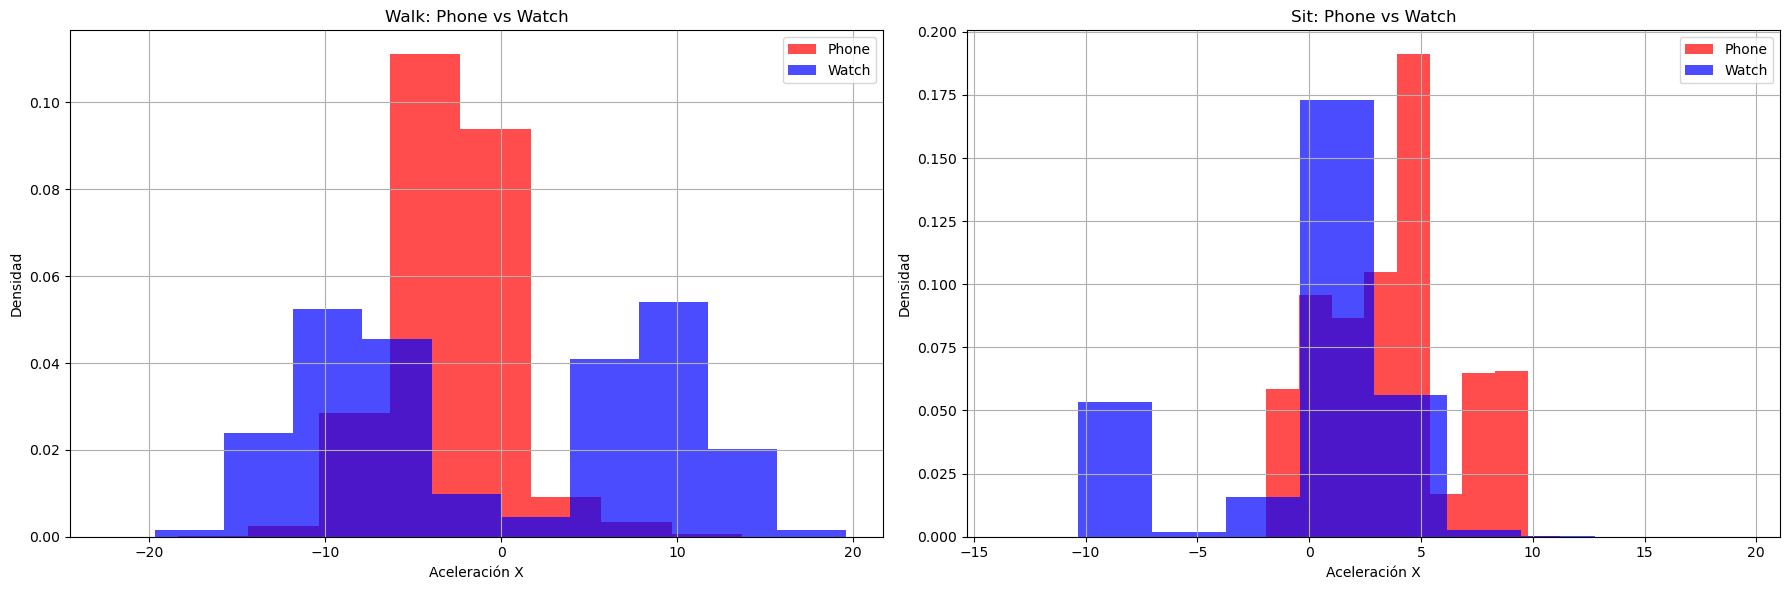

In [42]:
# Solución
# walk
ph_acc_common_walk_x = ph_acc_common[ph_acc_common['gt'] == 'walk']['x']
wat_acc_common_walk_x = wat_acc_common[wat_acc_common['gt'] == 'walk']['x']

# sit
ph_acc_common_sit_x = ph_acc_common[ph_acc_common['gt'] == 'sit']['x']
wat_acc_common_sit_x = wat_acc_common[wat_acc_common['gt'] == 'sit']['x']

# Crear una figura con 3 subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Histograma de walk (phone vs watch)
axes[0].hist(ph_acc_common_walk_x, density=True, color='red', alpha=0.7, label='Phone')
axes[0].hist(wat_acc_common_walk_x, density=True, color='blue', alpha=0.7, label='Watch')
axes[0].set_title('Walk: Phone vs Watch')
axes[0].set_xlabel('Aceleración X')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid()

# Subplot 2: Histograma de sit (phone vs watch)
axes[1].hist(ph_acc_common_sit_x, density=True, color='red', alpha=0.7, label='Phone')
axes[1].hist(wat_acc_common_sit_x, density=True, color='blue', alpha=0.7, label='Watch')
axes[1].set_title('Sit: Phone vs Watch')
axes[1].set_xlabel('Aceleración X')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

**Interpretación**

## Ejercicio 7: Comparativa Acelerómetro vs Giroscopio (Teléfono)

🔹 **Qué hacer:**  
- Filtra los datos del giroscopio del teléfono para quedarte solo con las actividades `walk` y `sit`, igual que en el acelerómetro.
- Representa en un **histograma** las distribuciones de aceleraciones en el eje **X** para el acelerómetro (`ph_acc_common`) y para el giroscopio (`ph_gyr_common`), en la misma gráfica.

🔹 **¿Por qué es importante?:**  
- Ver qué sensor aporta más información según el tipo de actividad ayuda a optimizar modelos de reconocimiento de actividades.
- Entender qué diferencias existen entre acelerómetro y giroscopio permite seleccionar el sensor adecuado para cada problema.

🔹 **Preguntas para reflexión:**  
- ¿Qué diferencias ves entre las señales del acelerómetro y el giroscopio?

Las señales del giroscopio están muchas uniformemente distribuidas que las del acelerómetro.

- ¿En qué tipos de actividades crees que el giroscopio podría ser más útil que el acelerómetro?

 El acelerómetro es más útil en actividades que involucran giros, cambios de orientación o movimientos rotatorios, donde el acelerómetro (que mide aceleración lineal) podría no capturar bien la dinámica.

- ¿Podría ser interesante combinar la información de ambos sensores?

Sí. El acelerómetro y el giroscopio proporcionan información complementaria: el acelerómetro captura traslaciones y aceleraciones lineales (útil para movimientos como caminar o correr), mientras que el giroscopio mide rotaciones (útil para giros y orientaciones). 


In [43]:
# Solución
ph_acc_common = Phones_accelerometer[Phones_accelerometer['gt'].isin(['walk', 'sit'])]
ph_gyr_common = Phones_gyroscope[Phones_gyroscope['gt'].isin(['walk', 'sit'])]

**Visualización extra:** Histogramas superpuestos de aceleraciones vs velocidades angulares (eje X).

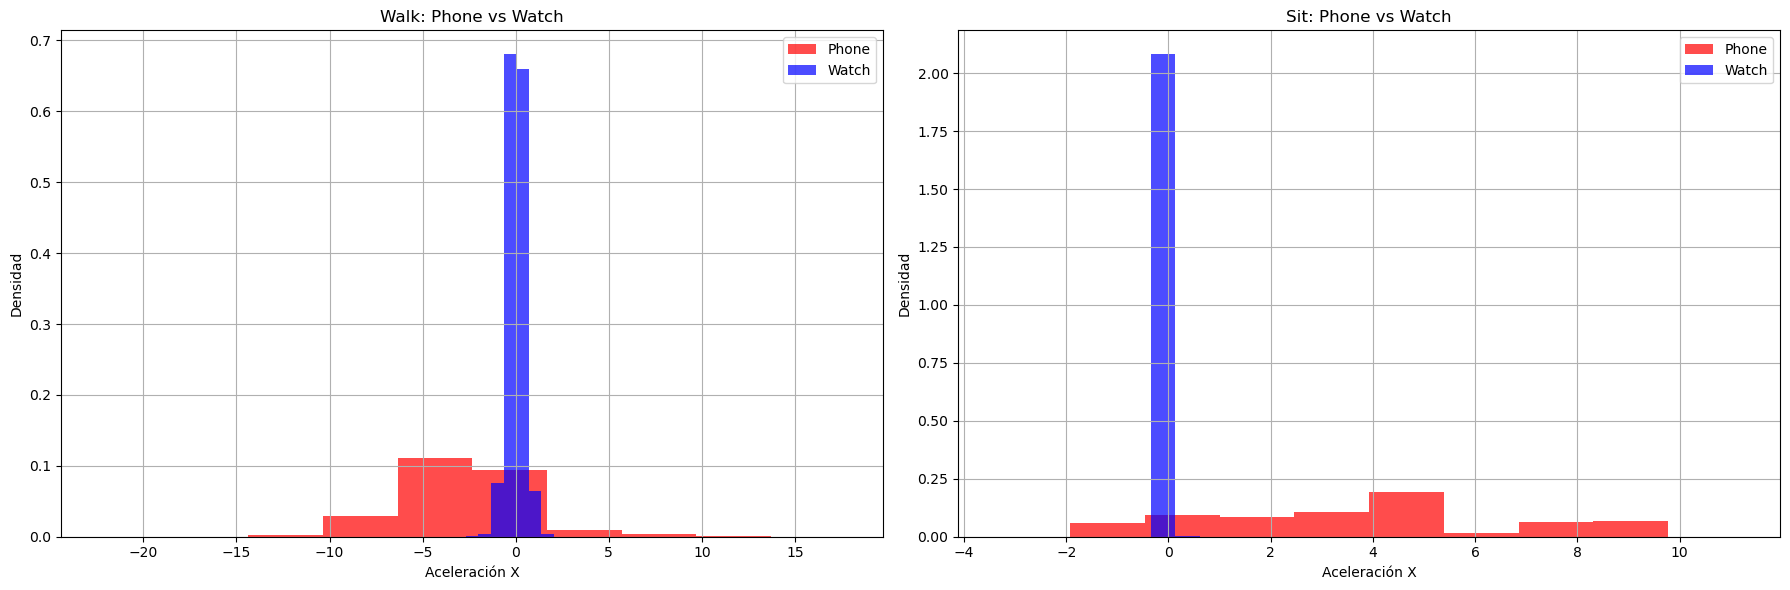

In [44]:
# Solución
# walk
ph_acc_common_walk_x = ph_acc_common[ph_acc_common['gt'] == 'walk']['x']
ph_gyr_common_walk_x = ph_gyr_common[ph_gyr_common['gt'] == 'walk']['x']

# sit
ph_acc_common_sit_x = ph_acc_common[ph_acc_common['gt'] == 'sit']['x']
ph_gyr_common_sit_x = ph_gyr_common[ph_gyr_common['gt'] == 'sit']['x']

# Crear una figura con 3 subplots (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Histograma de walk (phone vs watch)
axes[0].hist(ph_acc_common_walk_x, density=True, color='red', alpha=0.7, label='Phone')
axes[0].hist(ph_gyr_common_walk_x, density=True, color='blue', alpha=0.7, label='Watch')
axes[0].set_title('Walk: Phone vs Watch')
axes[0].set_xlabel('Aceleración X')
axes[0].set_ylabel('Densidad')
axes[0].legend()
axes[0].grid()

# Subplot 2: Histograma de sit (phone vs watch)
axes[1].hist(ph_acc_common_sit_x, density=True, color='red', alpha=0.7, label='Phone')
axes[1].hist(ph_gyr_common_sit_x, density=True, color='blue', alpha=0.7, label='Watch')
axes[1].set_title('Sit: Phone vs Watch')
axes[1].set_xlabel('Aceleración X')
axes[1].set_ylabel('Densidad')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

**Interpretación**

## Ejercicio 8: Correlación entre sensores

🔹 **Qué hacer:**  
- Une los datos del acelerómetro (`ph_acc_common`) y del giroscopio (`ph_gyr_common`) usando solo los ejes `x`, `y`, `z`, ajustando los índices.
- Crea un nuevo DataFrame combinando ambos sensores.
- Calcula y visualiza la **matriz de correlación** entre todas las variables usando un **mapa de calor**.

🔹 **¿Por qué es importante?:**  
- Entender la correlación entre sensores ayuda a detectar si hay redundancia (información duplicada) o complementariedad (información adicional).
- Saber qué variables están correlacionadas permite optimizar modelos, eliminar variables innecesarias o detectar relaciones ocultas en los datos.

🔹 **Preguntas para reflexión:**  
- ¿Qué pares de variables presentan mayor correlación?

Los pares con mayor correlación los parámetros que están emparejados consigo mismo, de manera que siempre la correalción será 1.

- ¿Existe más correlación entre ejes del mismo sensor o entre sensores diferentes?

Hay un infima correlación entre pares que no son iguales, pero nada destacable

- ¿Cómo podrías usar esta información para mejorar un modelo de predicción?

Sí, ya que podrías direccionar tu investigación en otro sentido en busca de mayor correlación entre las variables estudiadas.


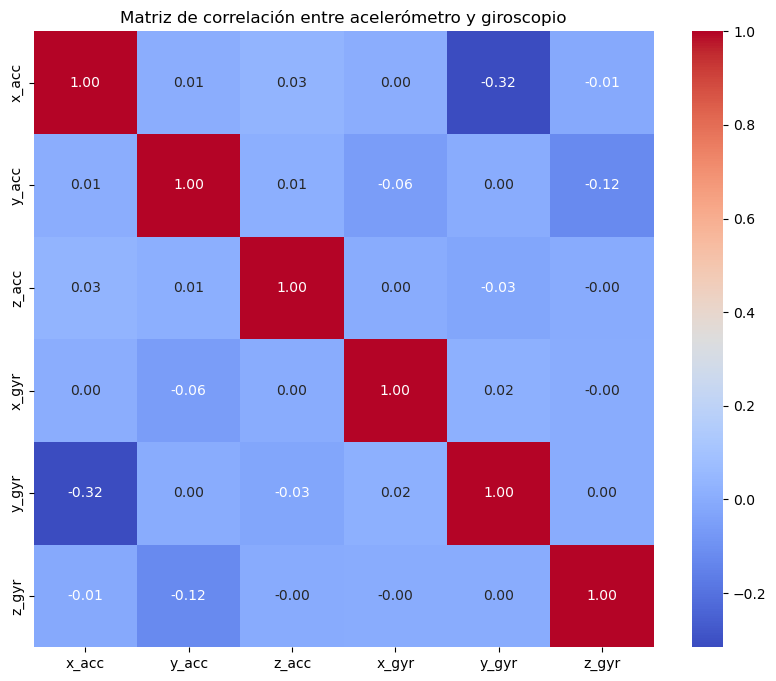

In [56]:
# Solución

ph_acc_common_reset = ph_acc_common.reset_index(drop=True)
ph_gyr_common_reset = ph_gyr_common.reset_index(drop=True)
union_acc_gyr = pd.concat([ph_acc_common_reset, ph_gyr_common_reset], axis=1)

correlation_matrix = union_acc_gyr[['x', 'y', 'z']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=['x_acc', 'y_acc', 'z_acc', 'x_gyr', 'y_gyr', 'z_gyr'], yticklabels=['x_acc', 'y_acc', 'z_acc', 'x_gyr', 'y_gyr', 'z_gyr'])
plt.title('Matriz de correlación entre acelerómetro y giroscopio')
plt.show()

**Interpretación**